In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [13]:
df.shape

(11430, 89)

In [15]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [19]:
df.describe(include='all')

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430
unique,11429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,http://e710z0ear.du.r.appspot.com/c:/users/use...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimate
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5715
mean,NaN,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,NaN
std,NaN,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,NaN
min,NaN,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN
25%,NaN,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,NaN
50%,NaN,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,NaN
75%,NaN,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,NaN


In [21]:
df.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [23]:
pd.set_option('display.max_columns',None)

In [25]:
pd.reset_option('display.max_columns')

In [27]:
print(df.columns.tolist())

['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'rat

In [29]:
# Checking whether the dataset is balanced or not
counts = df['status'].value_counts()
counts

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

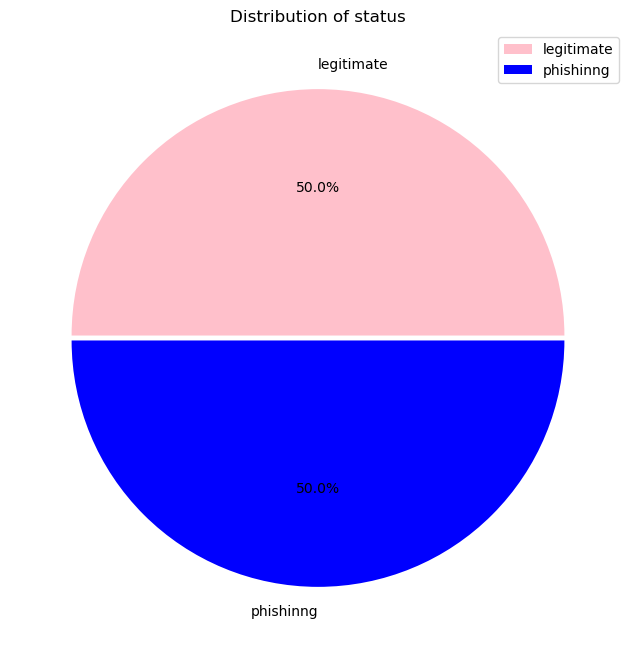

In [31]:
plt.figure(figsize=(18,8))
plt.pie(counts.values,labels=['legitimate','phishinng'],autopct='%0.1f%%', colors=['pink','blue'],explode=[0.01,0.01])
plt.title('Distribution of status')
plt.legend()
plt.show()

In [33]:
# encoding the target value into numerical value using LabelEncoder
encode = LabelEncoder()
df.url = encode.fit_transform(df.url)
df.status = encode.fit_transform(df.status)

In [35]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4501,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,3063,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,8984,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,2778,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,5261,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [37]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, random_state= 24)

In [39]:
print(f'Train: {x_tr.shape}, {y_tr.shape} ')
print(f'Test: {x_ts.shape}, {y_ts.shape}')

Train: (9144, 88), (9144,) 
Test: (2286, 88), (2286,)


In [41]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing models
models = {
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=18)
}

# Producing cross validaton score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10,
                            n_jobs=-1,
                            scoring=cv_scoring)

    print('**'*30)
    print(model_name)
    print(f'Scores: {scores}')
    print(f'Mean score: {np.mean(scores)}')

************************************************************
SVC
Scores: [0.6264217  0.58967629 0.61067367 0.58705162 0.59405074 0.60454943
 0.59405074 0.60542432 0.58267717 0.61154856]
Mean score: 0.6006124234470691
************************************************************
Gaussian NB
Scores: [0.7384077  0.776028   0.76990376 0.75415573 0.74628171 0.77077865
 0.76377953 0.77077865 0.77340332 0.74978128]
Mean score: 0.7613298337707788
************************************************************
Random Forest
Scores: [0.9720035  0.96587927 0.96762905 0.96675416 0.95888014 0.96500437
 0.95975503 0.95975503 0.97287839 0.96762905]
Mean score: 0.9656167979002624


In [43]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(x_tr, y_tr)
preds = svm_model.predict(x_ts)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_tr, svm_model.predict(x_tr))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_ts, preds)*100}")

Accuracy on train data by SVM Classifier: 59.787839020122476
Accuracy on test data by SVM Classifier: 60.71741032370953


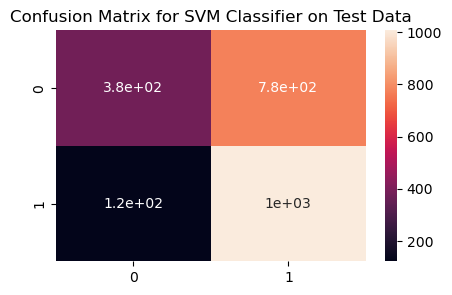

In [45]:
cf_matrix = confusion_matrix(y_ts, preds)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

In [47]:
# Training and testing on Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(x_tr, y_tr)
preds = nb_model.predict(x_ts)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_tr, nb_model.predict(x_tr))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_ts, preds)*100}")

Accuracy on train data by Naive Bayes Classifier: 76.45450568678915
Accuracy on test data by Naive Bayes Classifier: 74.10323709536308


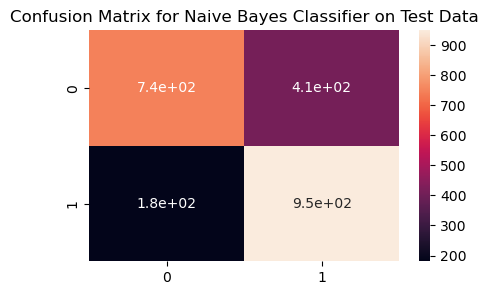

In [49]:
cf_matrix = confusion_matrix(y_ts, preds)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [51]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(x_tr, y_tr)
preds = rf_model.predict(x_ts)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_tr, rf_model.predict(x_tr))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_ts, preds)*100}")

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 96.2817147856518


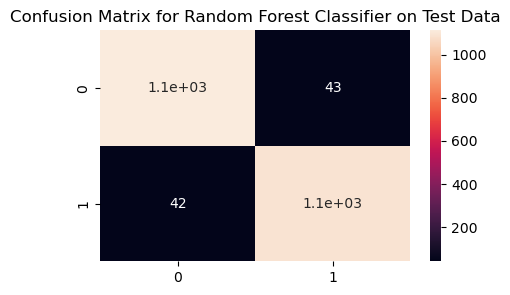

In [53]:
cf_matrix = confusion_matrix(y_ts, preds)
plt.figure(figsize=(5,3))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [55]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [57]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encode.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Safe Anchor,Domain Age,Web Traffic,Dns Record")) 

{'rf_model_prediction': 'legitimate', 'naive_bayes_prediction': 'phishing', 'svm_model_prediction': 'phishing', 'final_prediction': 'phishing'}
